# A Study in Kickstarter

In [1274]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [1275]:
## import the data
df = pd.read_csv('archive/ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [1276]:
df.shape

(378661, 15)

In [1277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [1278]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

- The dataset contains almost no missing data, except for two columns
- The name column only has four missing projects while the `usd_pledged` contains 2797
- `usd_pledged` and `usd_pledged_real` represent USD conversion of pledged column. 
    - However, `usd_pledged_real` is the conversion from Fixer.io API, a foreign currency exchange source.

## Business Understanding: Questions to Consider

1 - Which project categories are more likely to succeed?

2 -  What is the association between project outcome and fundraising goal?

3 -  Which categories are the most popular among backers and, among them, which subcategories tend to exceed or fall behind their goals?

## Data Preparation

In [1279]:
## convert the deadline and launched variables to data
df['deadline'] = pd.to_datetime(df.deadline)
df['launched'] = pd.to_datetime(df.launched)

In [1280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 43.3+ MB


- The country column has missing values denoted as 'N,0"', I am going to add the countries using the currency column

In [1281]:
## change N,0" to country
no_country = df[df['country'] == 'N,0"']
no_country.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00


In [1282]:
no_country.currency.unique()

array(['USD', 'AUD', 'CAD', 'GBP', 'EUR', 'SEK', 'DKK', 'NZD', 'NOK',
       'CHF'], dtype=object)

In [1283]:
df.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

- Looks like the EUR wuld be very challenging to complete since it covers multiple countries in the European Union. Therefore, I can denote it as 'EU' for European Union.

In [1284]:
## these variables should be dropped since country cannot be determined  
(no_country.currency == 'EUR').sum()

186

In [1285]:
## drop Euro currencies where country is unknown
no_europe = df[(df['country'] == 'N,0"') & (df['currency'] == 'EUR')]
df.drop(index= no_europe.index, inplace = True)

In [1286]:
country_currencies = {'USD': 'US', 'AUD':'AU', 'CAD':'CA', 'GBP':'GB',
                     'SEK':'SE', 'DKK':'DK', 'NZD':'NZ', 'NOK':'NO', 'SHF':'CH'}

In [1287]:
## replace N,0" with currency's country
for country, currency in zip(df.country, df.currency):
    if country == 'N,0"':
        df.country = df.country.str.replace('N,0"', country_currencies[currency])
    else:
        continue

In [1288]:
## drop state 'live' since they do not clearly indicate whether a project succeeded or failed
df = df[df['state'] != 'live']

In [1289]:
df.reset_index(inplace= True, drop = True)

## Data Understanding: Exploratory Data Analysis

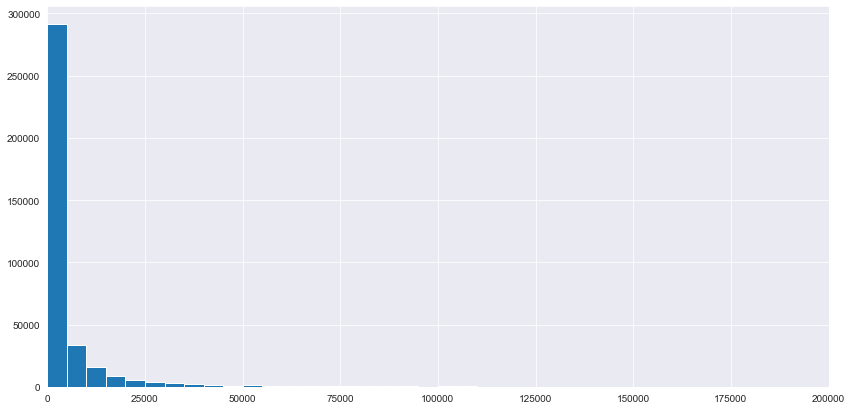

In [1290]:
plt.figure(figsize = (14, 7))
plt.hist(df.usd_pledged_real, bins = np.arange(0, 200000, 5000))
plt.xlim(0, 200000);


In [1291]:
pct_pledged = (df['usd pledged'] == df['usd_pledged_real']).mean() * 100
print(round(pct_pledged, 2), '% of USD pledged observations equal USD pledged real')

69.72 % of USD pledged observations equal USD pledged real


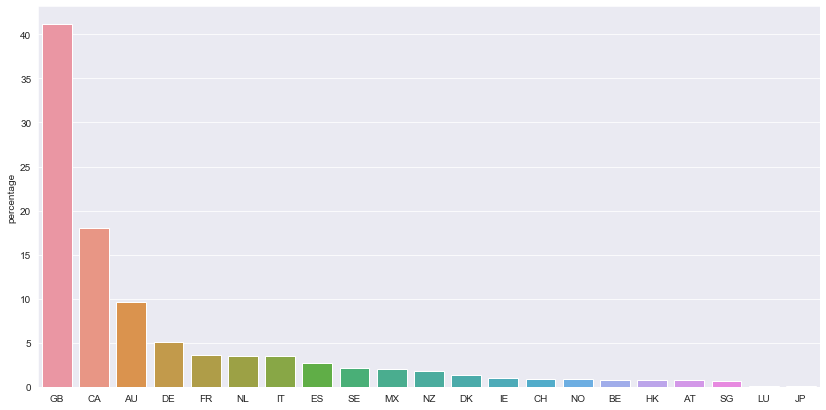

In [1292]:
df_no_us = df[df['country'] != 'US']
countries = pd.DataFrame(df_no_us['country'].value_counts()/len(df_no_us) * 100)
countries.rename(columns = {'country': 'percentage'}, inplace = True)


plt.figure(figsize = (14, 7))

sns.barplot(data = countries, x = countries.index, y = 'percentage');

- Since 80% of the dataset's projects are from the United States, the country variable might not be very important here

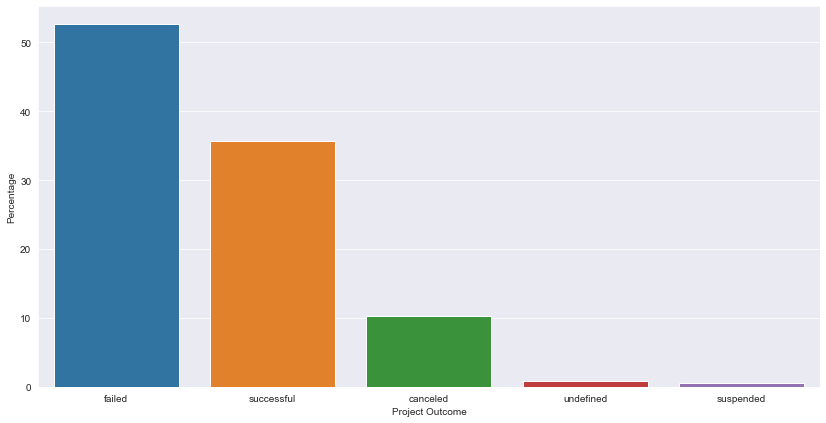

In [1293]:
## success stories
outcomes = pd.DataFrame(df['state'].value_counts()/len(df) * 100)
outcomes.rename(columns = {'state': 'percentage'}, inplace = True)

plt.figure(figsize = (14, 7))

sns.barplot(data = outcomes, x = outcomes.index, y = 'percentage')
plt.xlabel('Project Outcome')
plt.ylabel('Percentage');

- As I am getting to know about kickstarter, I am quite surprised to find that projects typically fail more often than succeeed. 

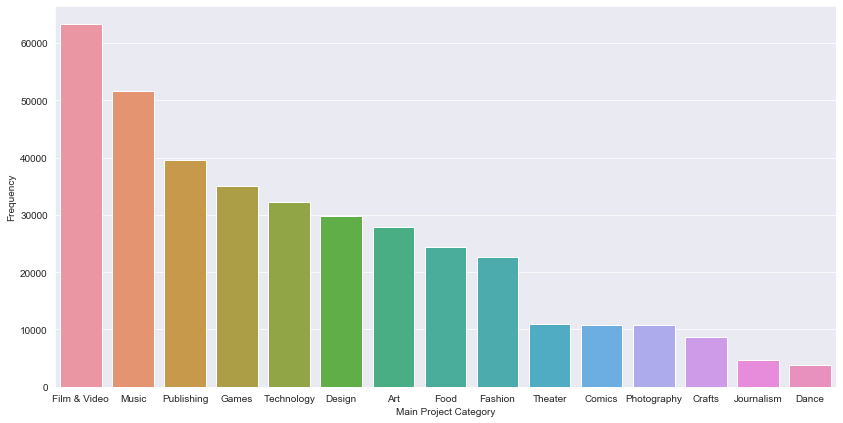

In [1294]:
## Main category frequency

plt.figure(figsize = (14, 7))

sns.countplot(data = df, x = 'main_category', order = df.main_category.value_counts().index)
plt.xlabel('Main Project Category')
plt.ylabel('Frequency');

In [1295]:
## create success binary variable
success = []
for x in df.state:
    if (x == 'successful'):
        success.append(1)
    else:
        success.append(0)
        
df['successful'] = success

In [1296]:
df.deadline.min()

Timestamp('2009-05-03 00:00:00')

In [1297]:
df.deadline.max()

Timestamp('2018-02-24 00:00:00')

## 1. Which categories are more likely to succeed? Is this different from categories that fail?

In [1298]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


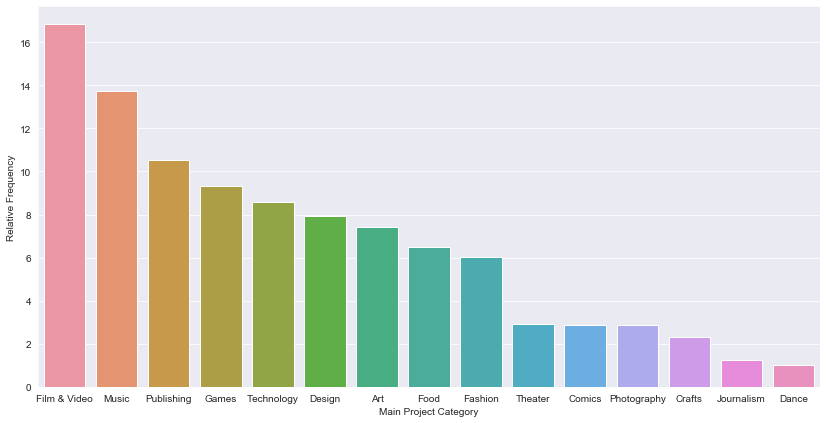

In [1299]:
## group by category (count)
cat_group = df.groupby('main_category').count()[['ID']]/len(df) * 100
cat_group.rename(columns = {'ID':'percentage'}, inplace = True)

plt.figure(figsize = (14, 7))
sns.barplot(data = cat_group, x = cat_group.index, y = 'percentage', order = df.main_category.value_counts().index)
plt.xlabel('Main Project Category')
plt.ylabel('Relative Frequency');

- according to the heatmap, meeting your goal clearly means that you succeeded, unless your project gets suspended or undefined for some reason

In [1300]:
success = []

for x in df.state:
    if x == 'successful':
        success.append(1)
    else:
        success.append(0)
        
df['successful'] = success

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


In [1301]:
## calculate probability of success and failyre for each main category
## P(Success|Category) = P(S int C)/P(C)
cat_group = df.groupby('main_category').count()[['ID']]
probs = df.groupby(['successful', 'main_category']).count()[['ID']]/cat_group
probs.reset_index(inplace = True)
probs.rename(columns = {'ID': 'probability'}, inplace = True)
probs.head()

,successful,main_category,probability
0,0,Art,0.588326
1,0,Comics,0.456204
2,0,Crafts,0.757815
3,0,Dance,0.376533
4,0,Design,0.645567


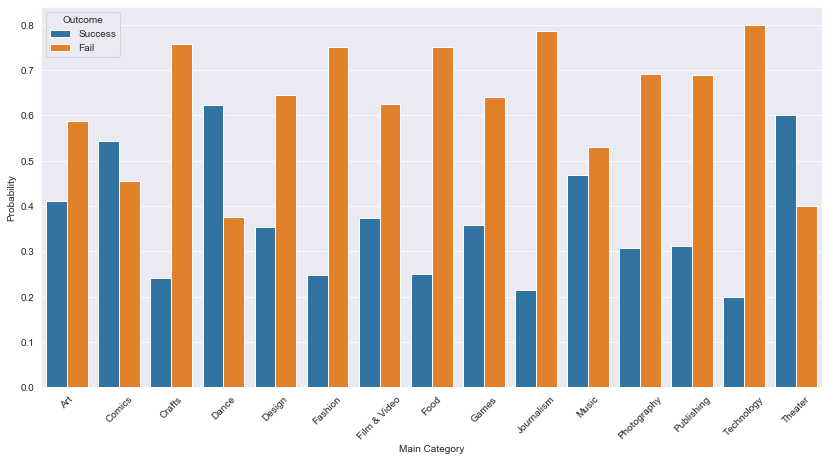

In [1302]:
plt.figure(figsize = (14, 7))
ax = sns.barplot(x = 'main_category', y = 'probability', hue = 'successful', hue_order= [1, 0], data = probs)

ax.set_xlabel('Main Category')
ax.set_ylabel('Probability')
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Success', 'Fail'], title = 'Outcome')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()


- The only main categories that have a higher chance of success are theater, dance, and comics projects.
    - Both theater and dance have a success probability of around 0.6 and failure around 0.4

## 2. How do fundraising goals relate to project outcome? If so, which classes are more successful?

In [1303]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


- It is said that projects typically succeed if they meet their fundraising goals

In [1304]:
## create a variable indicating whether project met goals by comparing pledge and goal
goal_met = []

for x, y in zip(df.usd_pledged_real, df.usd_goal_real):
    if x >= y: ## if pledged is greater than goal, then 1
        goal_met.append(1)
    else:
        goal_met.append(0)
    
goal_met2 = []
for x, y in zip(df.usd_pledged_real, df.usd_goal_real):
    if x >= y: ## if pledged is greater than goal, then 1
        goal_met2.append('yes')
    else:
        goal_met2.append('no')
        
df['goal_met'] = goal_met
        
df['goal_met2'] = goal_met2
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,goal_met,goal_met2
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0,no
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,0,no
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0,no
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,0,no
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,0,no


In [1305]:
## how many project meet their goals?
(df.usd_pledged_real >= df.usd_goal_real).mean()

0.3635180314952246

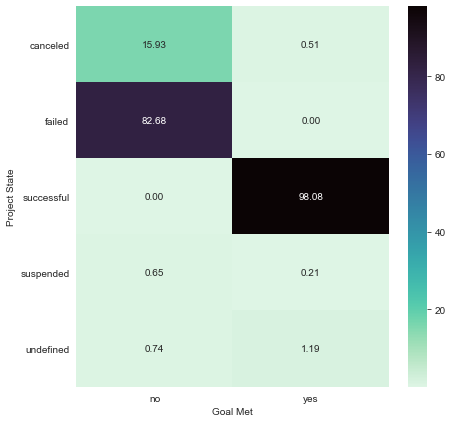

In [1306]:
## build a confusion matrix by comparing goal_met with state

plt.figure(figsize = (7, 7))
goal_met = df.groupby(['goal_met2']).count()[['ID']]
state_goals = df.groupby(['state', 'goal_met2']).count()[['ID']]/goal_met * 100
state_goals.reset_index(inplace = True)
sg_pivot = state_goals.pivot(index = 'state', columns = 'goal_met2', values = 'ID')


ax = sns.heatmap(sg_pivot, cmap = 'mako_r', annot = True, fmt = '.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Goal Met')
ax.set_ylabel('Project State')
for tick in ax.get_yticklabels():
    tick.set_rotation(0)
plt.show()

In [1307]:
## compare the last couple of years
df['year'] = pd.DatetimeIndex(df['launched']).year
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,goal_met,goal_met2,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0,no,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,0,no,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0,no,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,0,no,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,0,no,2015


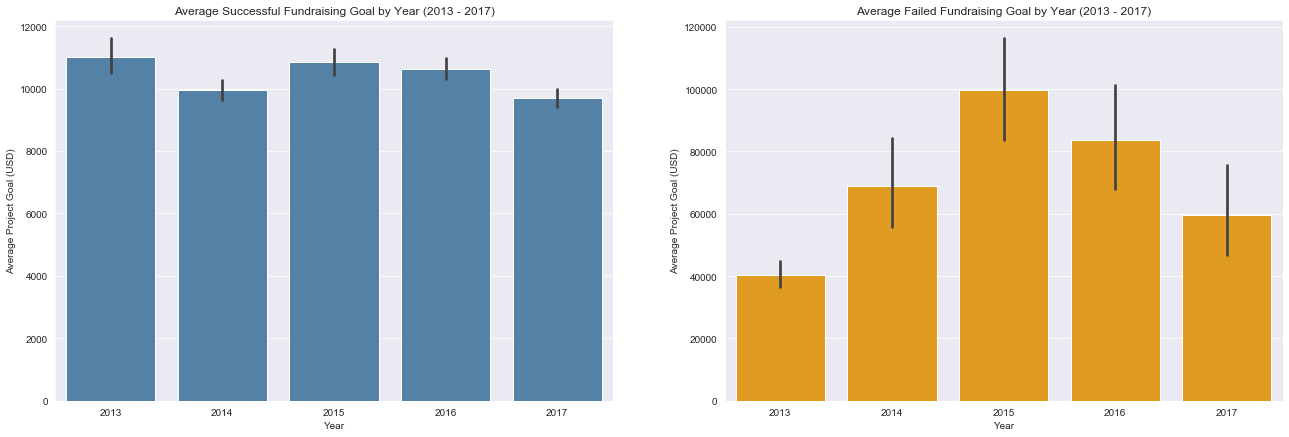

In [1308]:
## compare average goal by year
years = [2013, 2014, 2015, 2016, 2017]
df_years = df[df['year'].isin(years)]

## separate datasets for 'goal met' variable
df_year_nmet = df_years[df_years['goal_met2'] == 'no']
df_year_met = df_years[df_years['goal_met2'] == 'yes']

plt.figure(figsize = (22, 7))

plt.subplot(1, 2, 1)
sns.barplot(x = 'year', y = 'usd_goal_real', data = df_year_met, color= 'steelblue')
plt.xlabel('Year')
plt.ylabel('Average Project Goal (USD)')
plt.title('Average Successful Fundraising Goal by Year (2013 - 2017)')

plt.subplot(1, 2, 2)
sns.barplot(x = 'year', y = 'usd_goal_real', data = df_year_nmet, color= 'orange')
plt.xlabel('Year')
plt.ylabel('Average Project Goal (USD)')
plt.title('Average Failed Fundraising Goal by Year (2013 - 2017)')
plt.show()


- Throughout the years, the average goal is roughly the same for projects that met their goals, unlike those that didn't.

In [1309]:
df_year_met.groupby('year').max()[['usd_goal_real']]


,usd_goal_real
year,
2013,2000000.0
2014,1500000.0
2015,2000000.0
2016,1000000.0
2017,750000.0


In [1310]:
## log transform goal variable
df['ln_goal_usd'] = np.log(df.usd_goal_real)
df['ln_pledged_usd'] = np.log(df.usd_pledged_real + 1)
df['ln_backers'] = np.log(df.backers + 1)
df['log2_goal_usd'] = np.log2(df.usd_goal_real)

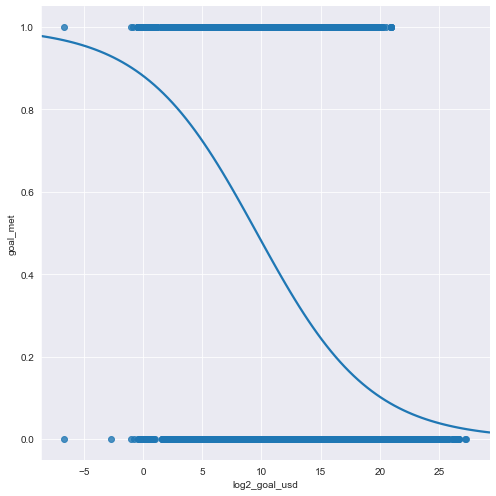

In [1311]:
## visualize a logistic curve (with log scale)
sns.lmplot(x = 'log2_goal_usd', y = 'goal_met', data = df, logistic= True,
          ci = None, height = 7, fit_reg = True);

- In general, the estimated odds of meeting your goal decrease by approximately 13% for every \$2 increase in project goal set.

- You should set your goal as low as possible in order to increase your chances of success

# 3. Which categories have the most backers, and which subcategories tend to fail the most?

In [1312]:
## define function that prints a heatmap of total sum by groups
def print_heatmap_sum(df, groupby, var, xlab, ylab):
    '''
    INPUT: dataframe, list of variables to group dataframe by, variable to show in the heatmap, x and y labels for heatmap
    OUTPUT: Heatmap for total values for 'var' argument
    '''

    lo = df.groupby(groupby).sum()
    lo = lo[[var]]
    lo.reset_index(inplace = True)

    lo_pivot = lo.pivot(index = groupby[0], columns = groupby[1], values = var)

    plt.figure(figsize = (10, 10))
    ax = sns.heatmap(lo_pivot, annot = True, fmt = 'd', cmap = 'mako_r');
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    plt.show()

In [1313]:
## define function that prints a heatmap of average by groups
def print_heatmap_mean(df, groupby, var, xlab, ylab):
    '''
    INPUT: dataframe, list of variables to group dataframe by, variable to show in the heatmap, x and y labels for heatmap
    OUTPUT: Heatmap for average values for 'var' argument
    '''

    lo = df.groupby(groupby).mean()
    lo = lo[[var]]
    lo.reset_index(inplace = True)

    lo_pivot = lo.pivot(index = groupby[0], columns = groupby[1], values = var)

    plt.figure(figsize = (10, 10))
    ax = sns.heatmap(lo_pivot, annot = True, fmt = '.1f', cmap = 'mako_r');
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    plt.show()

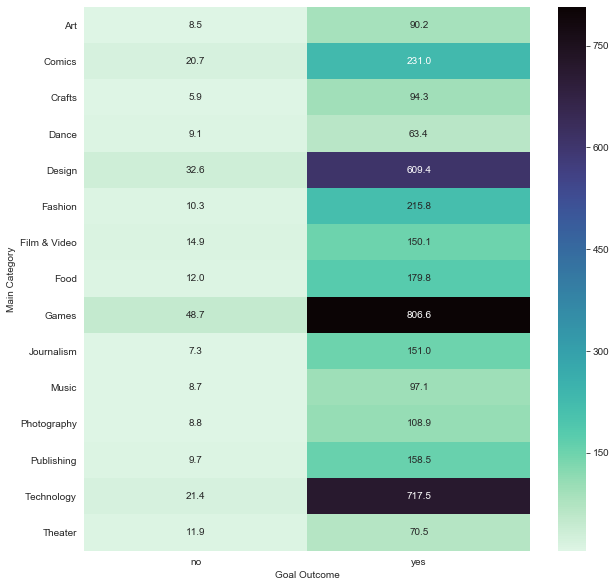

In [1314]:
print_heatmap_mean(df, ['main_category', 'goal_met2'], 'backers', xlab = 'Goal Outcome', ylab = 'Main Category')


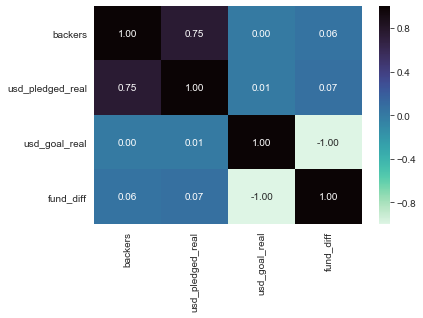

In [1322]:
df['fund_diff'] = df.usd_pledged_real - df.usd_goal_real
corr_vars = df[['backers', 'usd_pledged_real', 'usd_goal_real', 'fund_diff']]

ax = sns.heatmap(corr_vars.corr(), cmap = 'mako_r', annot = True, fmt = '.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [1323]:
backers_tot = df_met.groupby('main_category').mean()[['backers']]
backers_tot.sort_values(by = 'backers', ascending = False, inplace = True)

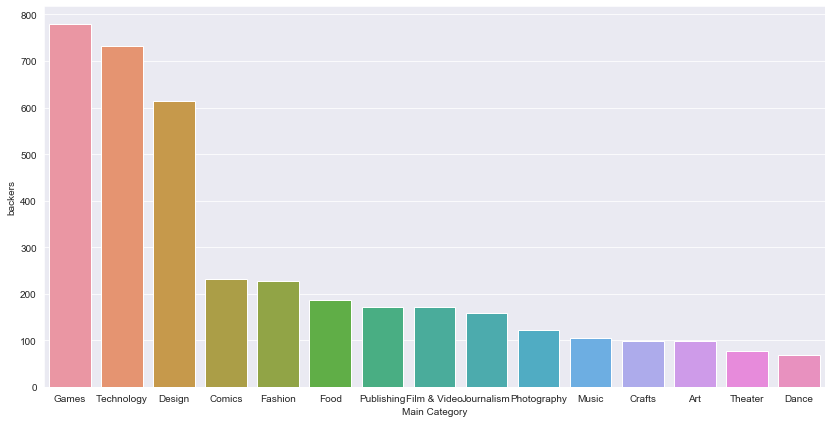

In [1328]:
## average number of backers by category for successful goal outcome
plt.figure(figsize = (14, 7))
sns.barplot(data = df_met, x = 'main_category', y = 'backers', ci = False, order = backers_tot.index)
plt.xlabel('Main Category');


In [1318]:
backers_tot = df_nmet.groupby('main_category').mean()[['backers']]
backers_tot.sort_values(by = 'backers', ascending = False, inplace = True)

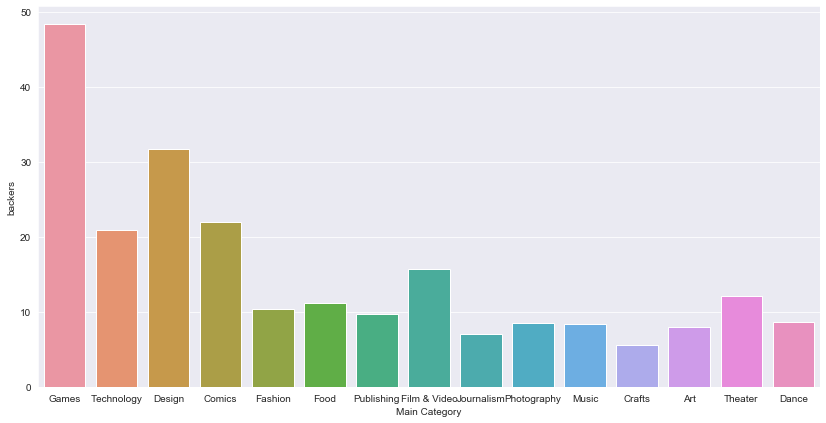

In [1329]:
## average number of backers by category for successful goal outcome
## same order as successful counterpart
plt.figure(figsize = (14, 7))
sns.barplot(data = df_nmet, x = 'main_category', y = 'backers', ci = False, order = backers_tot.index)
plt.xlabel('Main Category');


- In general, projects involving games have the highest total backers both in failed and successful projects. 
- Other categories that have the highest total of backers include design and technology
- So, I ask myself, why do games fail if they seem to have a large number of backers?
- Check if deadline is too long or any game types have large funding differences
- Do the same process for film and design stuff

- Videogames is the most failed games subcategory, as it is the category with thie higest total number of backers on both sides.
- plot whether days or debt contributes to success/failure

In [1330]:
## Split dataframe by the three categories
df_games = df[df['main_category'] == 'Games']
df_tech = df[df['main_category'] == 'Technology']
df_design = df[df['main_category'] == 'Design']

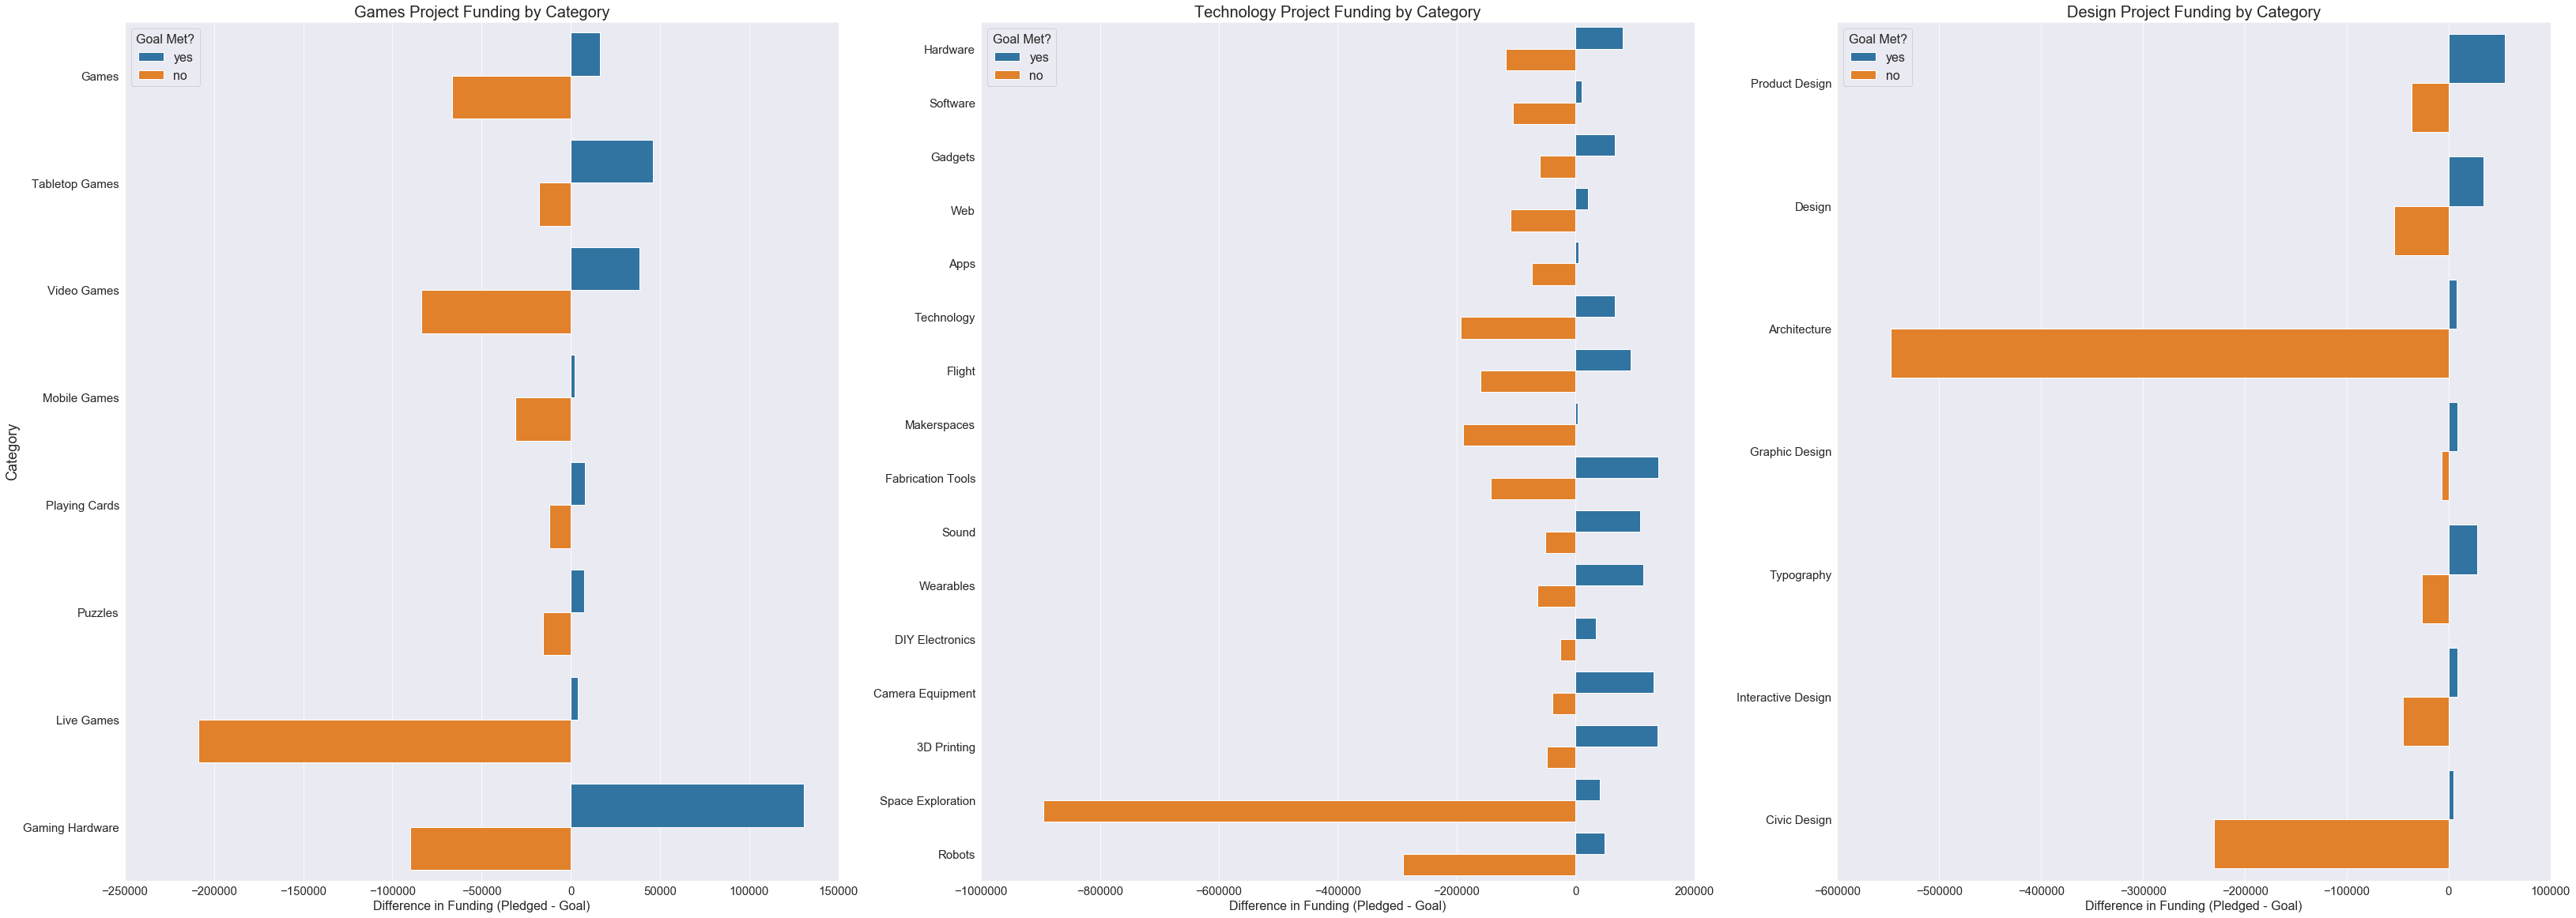

In [1331]:
plt.figure(figsize = (55, 20))
plt.subplot(1, 3, 1)
sns.barplot(data = df_games, y = 'category', x = 'fund_diff', hue = 'goal_met2',
            hue_order = ['yes', 'no'], estimator= np.mean, ci = False)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Category', fontsize = 18)
plt.xlabel('Difference in Funding (Pledged - Goal)', fontsize = 16)
plt.title('Games Project Funding by Category', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 16, title = 'Goal Met?', title_fontsize = 16)
plt.xlim(-250000, 150000)

plt.subplot(1, 3, 2)
sns.barplot(data = df_tech, y = 'category', x = 'fund_diff', hue = 'goal_met2',
            hue_order = ['yes', 'no'], estimator= np.mean, ci = False)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel(' ')
plt.xlabel('Difference in Funding (Pledged - Goal)', fontsize = 16)
plt.title('Technology Project Funding by Category', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 16, title = 'Goal Met?', title_fontsize = 16)
plt.xlim(-1000000, 200000)

plt.subplot(1, 3, 3)
sns.barplot(data = df_design, y = 'category', x = 'fund_diff', hue = 'goal_met2',
            hue_order = ['yes', 'no'], estimator= np.mean, ci = False)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel(ylabel =' ')
plt.xlabel('Difference in Funding (Pledged - Goal)', fontsize = 16)
plt.title('Design Project Funding by Category', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 16, title = 'Goal Met?', title_fontsize = 16)
plt.xlim(-600000, 100000)
plt.show()

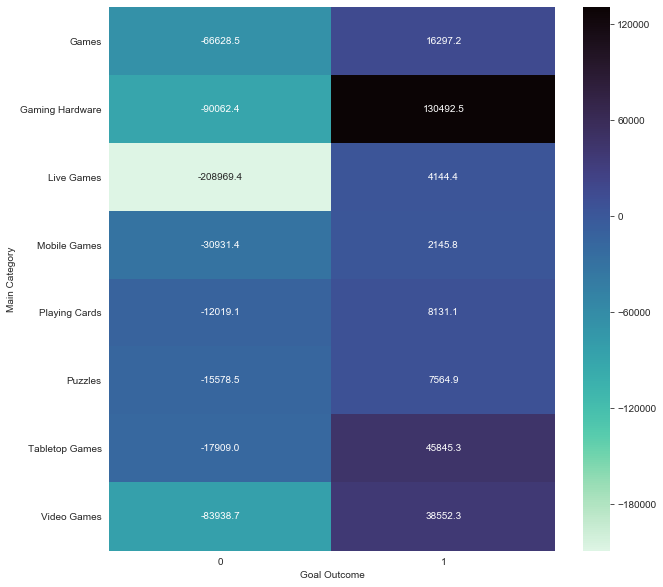

In [1105]:
## print heatmap versions by category for reference

## Games
print_heatmap_mean(df_games, ['category', 'goal_met'], 'fund_diff', xlab = 'Goal Outcome', ylab = 'Main Category')


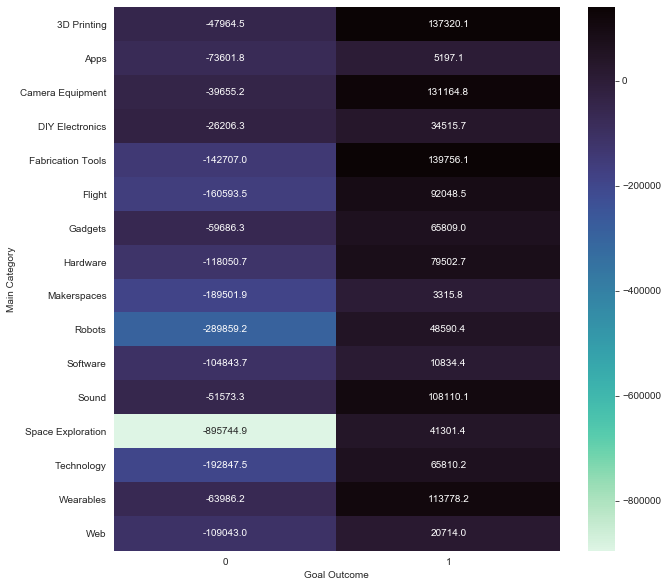

In [1327]:
## Technology
print_heatmap_mean(df_tech, ['category', 'goal_met'], 'fund_diff', xlab = 'Goal Outcome', ylab = 'Main Category')
